In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
BreastCancer = pd.read_csv('Breast-Cancer.csv')

In [3]:
BreastCancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = BreastCancer.drop('Classification', axis=1)
y = BreastCancer['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_classifier.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort features based on importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display the sorted features and their importance scores
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Glucose: 0.33222220446678674
Insulin: 0.14516338924233654
Age: 0.13806911129491778
Leptin: 0.11222908599176347
MCP.1: 0.10670912420912419
Adiponectin: 0.07524314765694082
Resistin: 0.053076923076923084
BMI: 0.0372870140612076
HOMA: 0.0


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Select the top 4 features
selected_features = ['Glucose', 'Insulin', 'Age', 'Leptin']

# Filter the dataset based on selected features
X_selected = BreastCancer[selected_features]
y = BreastCancer['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report_result)


Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.58      0.64        12
           2       0.64      0.75      0.69        12

    accuracy                           0.67        24
   macro avg       0.67      0.67      0.66        24
weighted avg       0.67      0.67      0.66        24



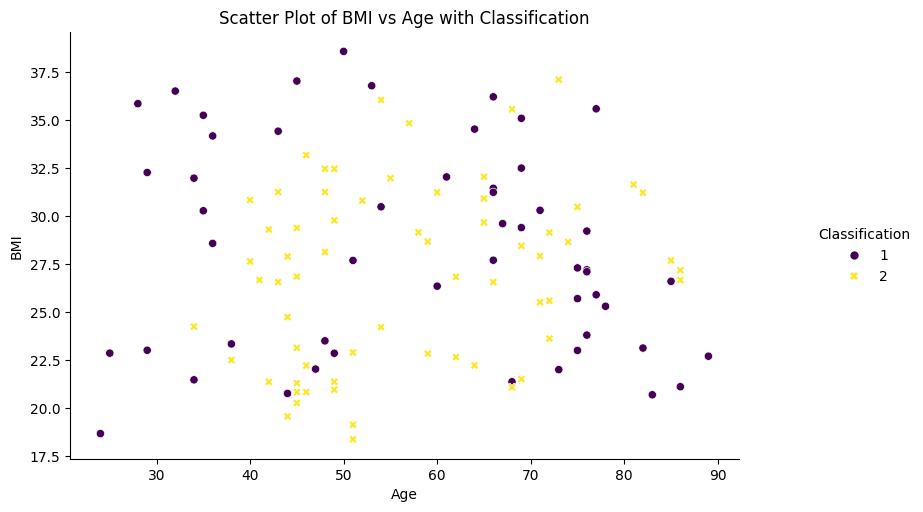

In [18]:
g = sns.relplot(x='Age', y='BMI', data=BreastCancer, hue='Classification', style='Classification', palette='viridis')
g.fig.set_size_inches(10, 5)
plt.title('Scatter Plot of BMI vs Age with Classification')
plt.show()


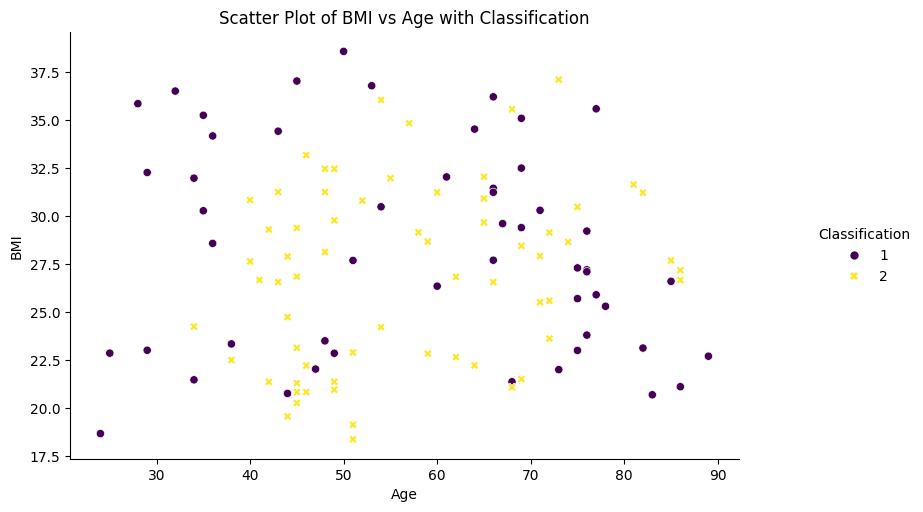

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.relplot(x='Age', y='BMI', data=BreastCancer, hue='Classification', style='Classification', palette='viridis')
g.fig.set_size_inches(10, 5)
plt.title('Scatter Plot of BMI vs Age with Classification')
plt.show()


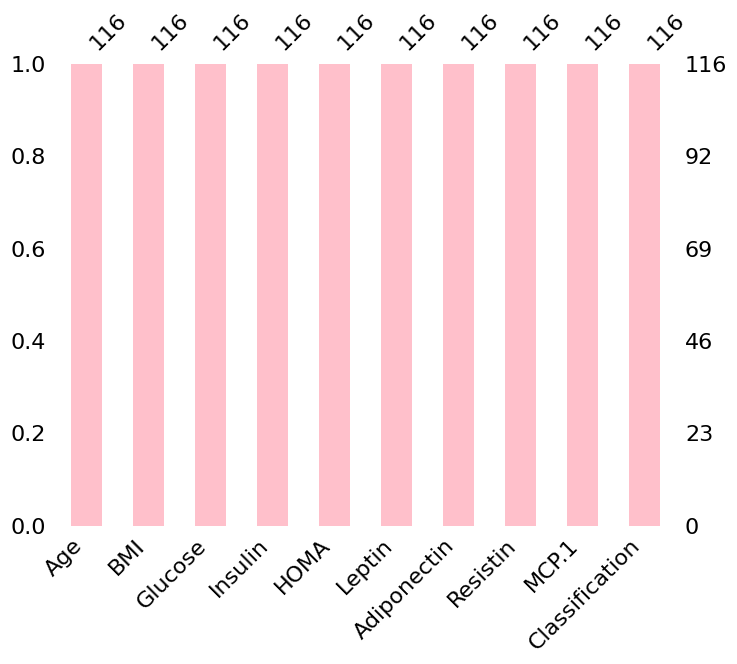

In [19]:
import missingno as msno
msno.bar(BreastCancer, figsize =(8,6), color="pink")
plt.show()

In [20]:
numeric_columns = BreastCancer.select_dtypes(include=[float, int]).columns
BreastCancer_numeric = BreastCancer[numeric_columns]
correlation_matrix = BreastCancer_numeric.corr()
print(correlation_matrix)

                     Age       BMI   Glucose   Insulin      HOMA    Leptin  \
Age             1.000000  0.008530  0.230106  0.032495  0.127033  0.102626   
BMI             0.008530  1.000000  0.138845  0.145295  0.114480  0.569593   
Glucose         0.230106  0.138845  1.000000  0.504653  0.696212  0.305080   
Insulin         0.032495  0.145295  0.504653  1.000000  0.932198  0.301462   
HOMA            0.127033  0.114480  0.696212  0.932198  1.000000  0.327210   
Leptin          0.102626  0.569593  0.305080  0.301462  0.327210  1.000000   
Adiponectin    -0.219813 -0.302735 -0.122121 -0.031296 -0.056337 -0.095389   
Resistin        0.002742  0.195350  0.291327  0.146731  0.231101  0.256234   
MCP.1           0.013462  0.224038  0.264879  0.174356  0.259529  0.014009   
Classification -0.043555 -0.132586  0.384315  0.276804  0.284012 -0.001078   

                Adiponectin  Resistin     MCP.1  Classification  
Age               -0.219813  0.002742  0.013462       -0.043555  
BMI      

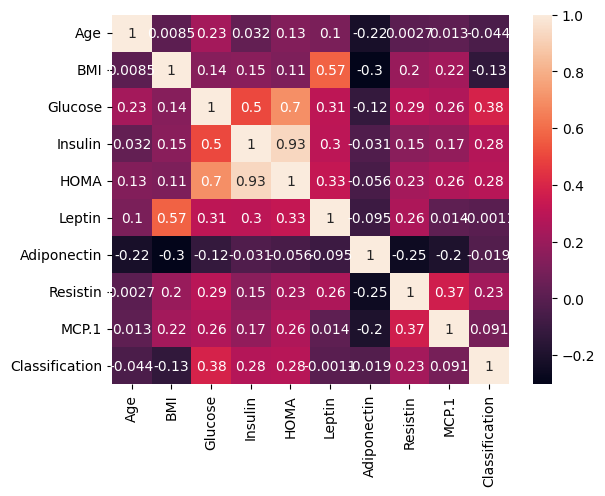

In [21]:
sns.heatmap(correlation_matrix, annot=True, color='pink')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y= le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)